In [34]:
# Ce code "TP_CNN_TSP"est basé sur tensorflow et keras pour construire un modele CNN
# Ce code est basé sur le tutorial de CNN-tensorflow https://www.tensorflow.org/tutorials/images/cnn
#Pour lier google Colab avec google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [35]:
# Pour importer les outils
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib import pyplot
import h5py
from tensorflow.keras.utils import img_to_array
tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


<module 'tensorflow' from '/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py'>

In [36]:
# Pour telécharger la database
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

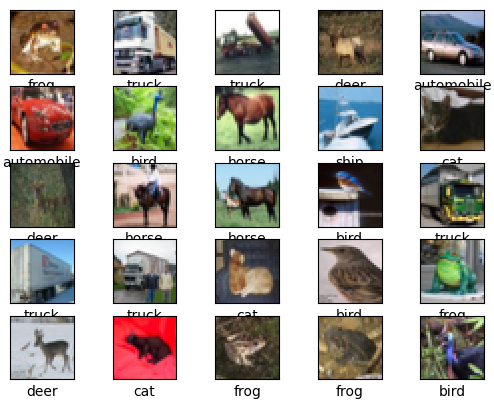

In [37]:
#Pour afficher 25 images de l'ensemble d'apprentissage
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

# Fix random seed for reproducibility
tf.random.set_seed(13)

# Model initialization
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Convolutional Block 1
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Classification Block
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))  # Number of classes in CIFAR-10
model.add(Activation('softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
#Pour afficher l'architecture du modele CNN
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_19 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 activation_20 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                     

In [40]:
#Pour compilation et entrainement
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))
model.save("/content/drive/My Drive/Colab Notebooks/my_model_10.h5")

Epoch 1/50
1563/1563 [==============================] - 32s 17ms/step - loss: 1.4697 - accuracy: 0.4932 - val_loss: 1.0307 - val_accuracy: 0.6351
Epoch 2/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9078 - accuracy: 0.6866 - val_loss: 0.8303 - val_accuracy: 0.7122
Epoch 3/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7392 - accuracy: 0.7475 - val_loss: 0.8592 - val_accuracy: 0.7066
Epoch 4/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6447 - accuracy: 0.7808 - val_loss: 0.6434 - val_accuracy: 0.7817
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5514 - accuracy: 0.8137 - val_loss: 0.5431 - val_accuracy: 0.8170
Epoch 6/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4822 - accuracy: 0.8364 - val_loss: 0.5035 - val_accuracy: 0.8307
Epoch 7/50
1563/1563 [==============================] - 26s 16ms/step - loss: 0.4306 - accuracy: 0.8535 - val_loss: 0.4800 -

In [41]:
#model=load_model("/content/drive/My Drive/Colab Notebooks/my_model_5.h5")

313/313 - 1s - loss: 0.5343 - accuracy: 0.8824 - 1s/epoch - 4ms/step


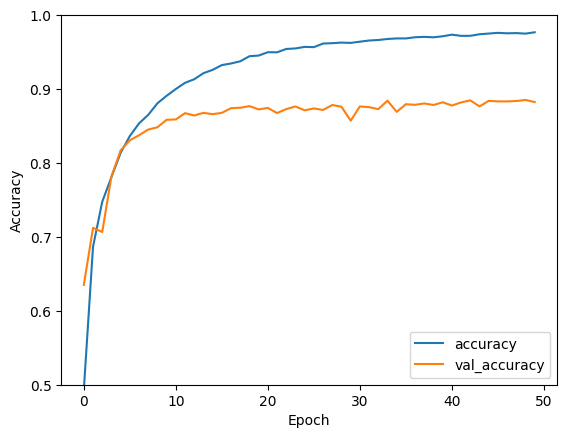

In [42]:
# Pour tracer la courbe accuracy en foctions de nombre des epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [43]:
print(test_acc)

0.8823999762535095


In [44]:
#pour importer l'image chien.jpg
img = cv2.imread("/content/drive/My Drive/Paris-Sacaly/Mini-Project/TP-CNN/chien.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
#Pour la prédiction de l'image chien
img = cv2.resize(img_cvt, (32,32))
img = img.astype('float32')
img= img / 255.0
imgs = tf.expand_dims(
    img,
    axis=0,
    name=None
)
model.predict(imgs)

In [ ]:
i=7
#pour visualiser la couche i
model2 = Model(inputs=model.inputs, outputs=model.layers[i].output)
model2.summary()
feature_maps = model2.predict(imgs)
square = 5
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()

In [ ]:
from tabulate import tabulate

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a list to store table data
table_data = []

# Evaluate the model for each class separately
for class_name, class_label in zip(class_names, range(10)):
    # Filter test images and labels corresponding to the current class
    class_test_images = test_images[test_labels[:, 0] == class_label]
    class_test_labels = test_labels[test_labels[:, 0] == class_label]

    # Count the number of images for the current class
    num_images = len(class_test_images)

    # Evaluate the model on the class-specific test set
    test_loss, test_acc = model.evaluate(class_test_images, class_test_labels, verbose=0)

    # Append class results to table data
    table_data.append([class_name, test_acc, num_images])

# Print the table
print(tabulate(table_data, headers=['Class', 'Accuracy', 'Number of Images']))